In [3]:
# Import of all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Read the csv file into dataframe
df = pd.read_csv('diamonds.csv')

In [5]:
# Printing the first 5 rows
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [6]:
# Removing the extra 'id' column
df=df.drop(labels=['Unnamed: 0'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# Printing general information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


In [8]:
# Printing the statistical info
print(df.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [9]:
# Checking the null data
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


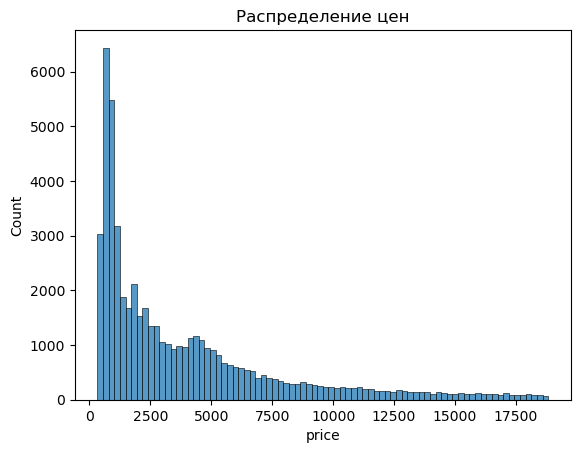

In [10]:
sns.histplot(df['price'])
plt.title('Распределение цен')
plt.show()

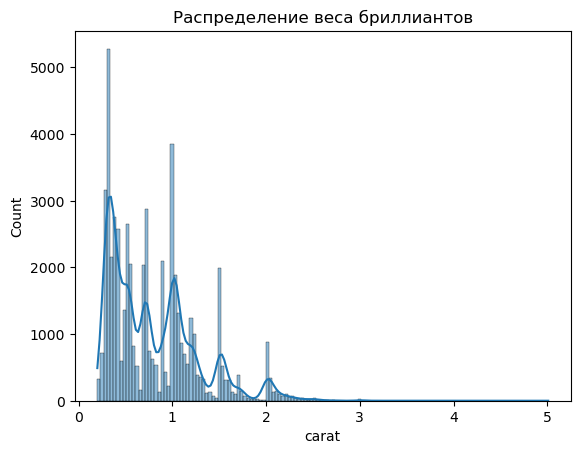

In [11]:
sns.histplot(df['carat'], kde="True")
plt.title('Распределение веса бриллиантов')
plt.show()

In [12]:
# Dividing columns into numerical and categorical data
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [13]:
# Printing the statistical info of categoricacl columns
df[categorical_columns].describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [14]:
# Printing the statistical info of numerical columns
df[numerical_columns].describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
# Displaying count of unique values in column 'cut'
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [16]:
# Displaying count of unique values in column 'color'
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [17]:
# Displaying count of unique values in column 'clarity'
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

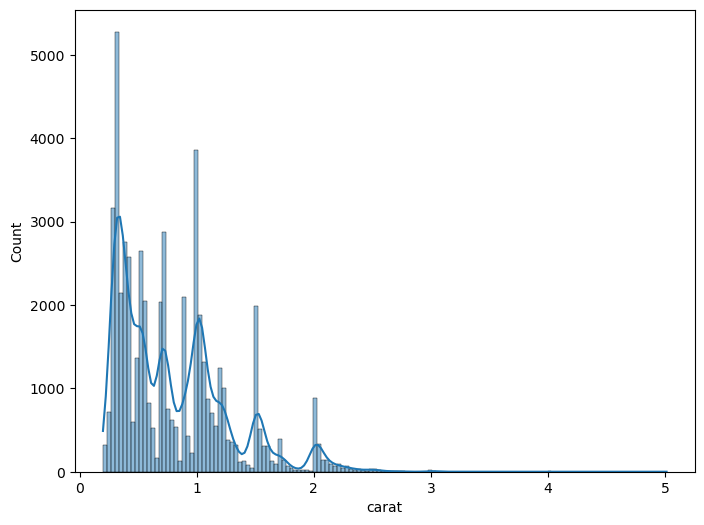

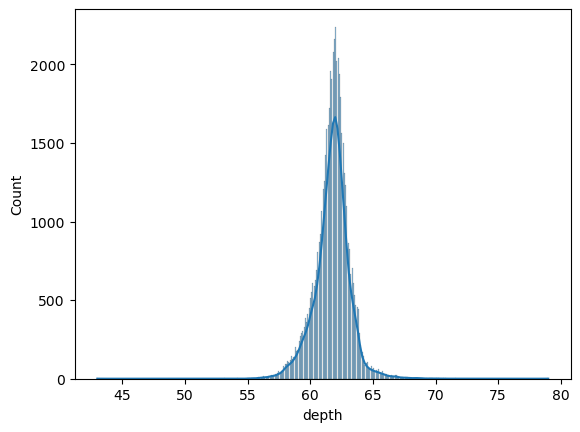

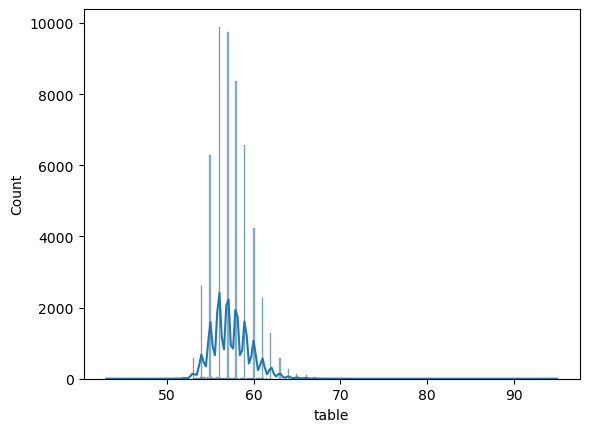

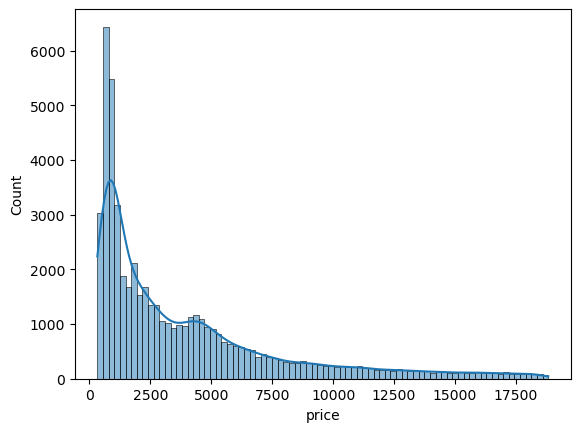

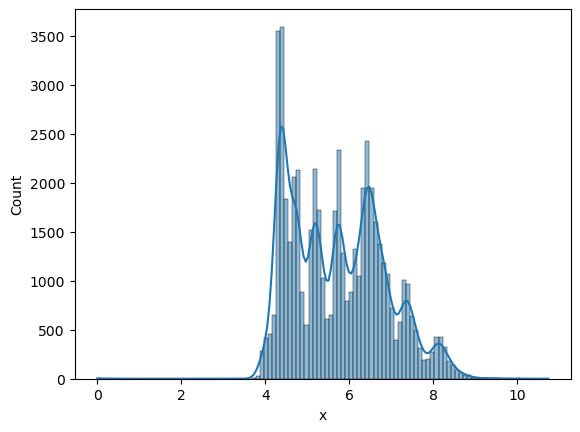

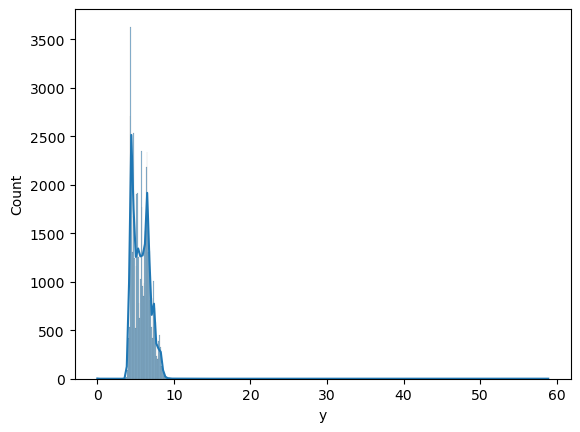

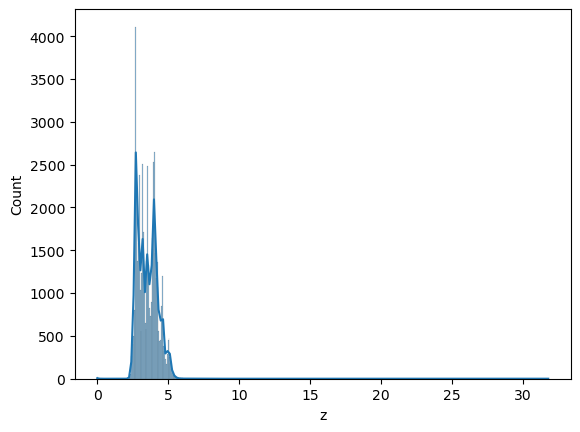

In [18]:
# Create figure and plot histograms for numerical columns
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Figure size 800x600 with 0 Axes>

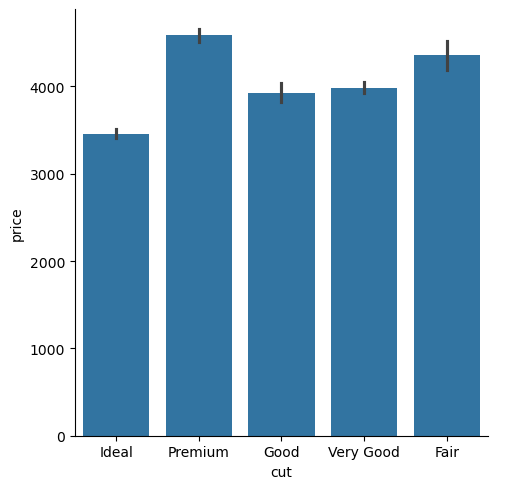

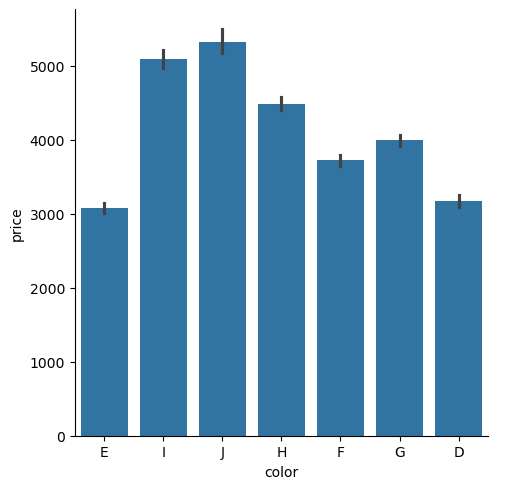

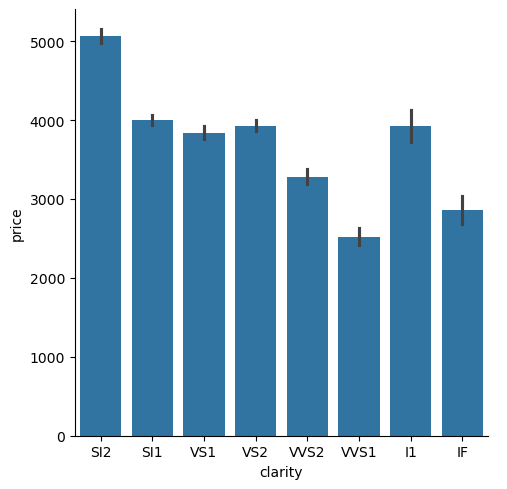

In [19]:
# Create figure and plot histograms for categoricacl columns
plt.figure(figsize=(8,6))

for i in categorical_columns:
    sns.catplot(data=df,x=i,y="price",kind="bar")
    print('\n')
    plt.show()

In [20]:
# Sorting in descending way the result of corellation of the 'price' column with other columns
price_corr = df.corr()["price"].sort_values(ascending=False)
# Getting the first 5 biggest corellations
top_features = price_corr.index[0:5]
# Plotting the heatmap to compare corellation of columns
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')


ValueError: could not convert string to float: 'Ideal'

In [ ]:
# CONVERTING CATEGORICAL COLUMNS INTO NUMERICAL BY WEIGHT

In [21]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [23]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [25]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [27]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [29]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [31]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [33]:
# Mapping the categories by numbers(weight)
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [35]:
# Ensuring the data convertation
categorical_columns = ['cut', 'color', 'clarity']

print("Categorical columns:")
for column in categorical_columns:
    print(f"  {column}:")
    print(df[column].value_counts())


Categorical columns:
  cut:
cut
5    21551
4    13791
3    12082
2     4906
1     1610
Name: count, dtype: int64
  color:
color
4    11292
2     9797
3     9542
5     8304
1     6775
6     5422
7     2808
Name: count, dtype: int64
  clarity:
clarity
3    13065
4    12258
2     9194
5     8171
6     5066
7     3655
8     1790
1      741
Name: count, dtype: int64


In [37]:
# Final result of EDA
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

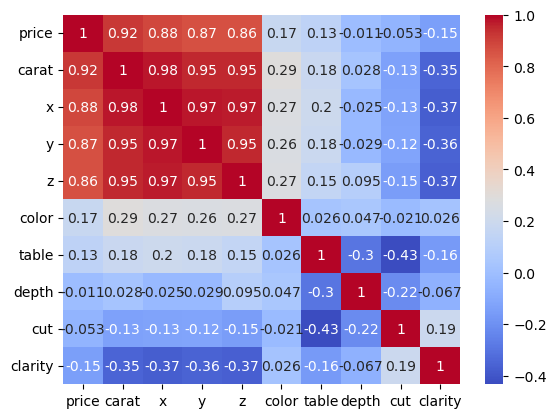

In [39]:
# Sorting in descending way the result of corellation of the 'price' column with other columns
price_corr = df.corr()["price"].sort_values(ascending=False)
# Getting the first 5 biggest corellations
top_features = price_corr.index[0:10]
# Plotting the heatmap to compare corellation of columns
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')